In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('SalaryData.csv')

In [4]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [5]:
df.tail()

,Education,Occupation,Salary
35,Bachelors,Exec-managerial,173935
36,Bachelors,Exec-managerial,212448
37,Bachelors,Exec-managerial,173664
38,Bachelors,Exec-managerial,212760
39,Doctorate,Exec-managerial,212781


In [6]:
df['Education'].value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [7]:
df['Occupation'].value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,40.0,162186.875,64860.407506,50103.0,99897.5,169100.0,214440.75,260151.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [19]:
df.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

In [20]:
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm 

In [21]:
formula = 'Salary~Education'

In [22]:
model = ols(formula,df).fit()

In [23]:
anova_edu = anova_lm(model)

In [24]:
anova_edu

,df,sum_sq,mean_sq,F,PR(>F)
Education,2.0,1.026955e+11,5.134773e+10,30.95628,1.257709e-08
Residual,37.0,6.137256e+10,1.658718e+09,NaN,NaN


In [25]:
formula = 'Salary~Occupation'

In [26]:
model = ols(formula,df).fit()

In [27]:
anova_occ = anova_lm(model)

In [28]:
anova_occ

,df,sum_sq,mean_sq,F,PR(>F)
Occupation,3.0,1.125878e+10,3.752928e+09,0.884144,0.458508
Residual,36.0,1.528092e+11,4.244701e+09,NaN,NaN


In [29]:
formula = 'Salary ~ C(Education) + C(Occupation)'

In [30]:
model = ols(formula,df).fit()

In [31]:
aov_table = anova_lm(model)

In [32]:
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,31.257677,1.981539e-08
C(Occupation),3.0,5.519946e+09,1.839982e+09,1.120080,3.545825e-01
Residual,34.0,5.585261e+10,1.642724e+09,NaN,NaN


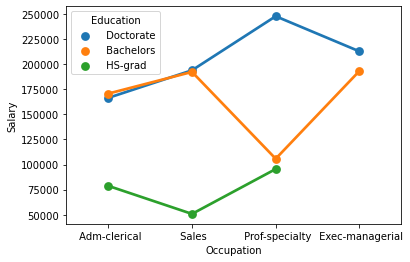

In [38]:
sns.pointplot(x='Occupation', y='Salary', data=df, hue='Education',ci=None);

In [46]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Education):C(Occupation),6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


In [48]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [54]:
tukey = pairwise_tukeyhsd(endog = df['Salary'], groups = df['Education'])

In [56]:
print(tukey)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


In [58]:
tukey = pairwise_tukeyhsd(endog = df['Salary'], groups = df['Occupation'])

In [60]:
print(tukey)

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4146  -40415.1459 151801.7459  False
    Adm-clerical   Prof-specialty  27528.8538 0.7252  -46277.4011 101335.1088  False
    Adm-clerical            Sales  16180.1167    0.9  -58951.3115  91311.5449  False
 Exec-managerial   Prof-specialty -28164.4462 0.8263 -120502.4542  64173.5618  False
 Exec-managerial            Sales -39513.1833 0.6507 -132913.8041  53887.4374  False
  Prof-specialty            Sales -11348.7372    0.9  -81592.6398  58895.1655  False
------------------------------------------------------------------------------------
